In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Tarea 1.1

In [2]:
def ideal_vel_map(npix, r_max, r_t, v_t):
    """
    Function to calculate the circular velocity in each radius of the galaxy according 
    to the simplest model of a galaxy's rotation curve (velocity grows linearly at the 
    beginning and then is constant).
    
    Parameters:
    -----------
    npix : Number of rows and columns of the square matrix
    r_max : Maximum radius of the galaxy (limits)
    r_t : Distance at which the galaxy reaches the maximum speed
    v_t : Maximum speed of the galaxy
    
    Return:
    ----------
    vel : Matrix of galaxy velocity
    """ 

    vel = np.zeros((npix, npix))
    #Edge 3% 
    edge = round(npix*0.03)

    #Conversion factor from pixels to radius
    pix2r = r_max/((npix/2)-edge)
    
    for i in range(npix):
        for j in range(npix):
            #Distance between each pixel and the center (in pixels)
            pix = np.sqrt((i-round(npix/2))**2 + (j-round(npix/2))**2)
            r = pix*pix2r  #Distance in the units of the radius
        
            if r <= r_t:
                vel[i, j] = (v_t*r)/r_t  #increasing velocity
                
            elif r_t < r <= r_max:
                vel[i, j] = v_t         #constant velocity
                
    # If you want that outside the galaxy the matrix has nan values            
    vel[vel == 0] = 'nan'           
    return vel

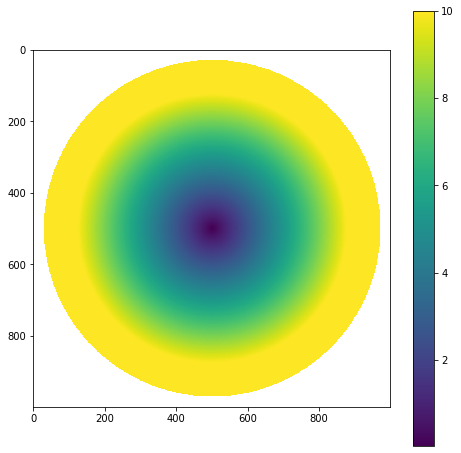

In [3]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(ideal_vel_map(1000,50,40,10))
#plt.contour(ideal_vel_map(1000,50,40,10), 45, zorder = 10, cmap = 'Greys')
plt.colorbar()
plt.show()

In [4]:
ideal_vel_map?

# Tarea 1.2

We want to calculated the velocity along the line of sight: 

$$V_{LOS}(R) = V_{sys} + V_{cir}(r) \times \frac{sin(i) cos(\psi-\psi_0)}{\alpha},$$

where $V_{sys}$ is the systemic velocity (translation velocity of the galaxy relative to us), $V_{cir}$ is the velocity profile of the galaxy, $i$ is the inclination angle of the galaxy, $\psi_0$ the position angle, $\psi$ the angle of each point in the galaxy to the semimajor axis, $\alpha$:

$$ \alpha = \sqrt{cos^2(\psi-\psi_0) + \frac{sin^2(\psi-\psi_0)}{cos^2(i)}},$$

and r:

$$ r = R \alpha, $$

where $R$ is the distance of each point in the galaxy to the center.

In [5]:
npix = 100
incl = 60
phi_0 = 20
phi = np.zeros((npix, npix))
alpha = np.zeros((npix, npix))
R = np.zeros((npix, npix))

for i in range(npix):
    for j in range(npix):
        #Distance between each pixel and the center (in pixels)
        y = -(i-round(npix/2))
        x = j-round(npix/2)
        pix = np.sqrt((i-round(npix/2))**2 + (j-round(npix/2))**2)
        R[i, j] = pix
        
        if x == 0 and y == 0:
            phi[i, j] = 0.0
        else:
            angle = np.arcsin(y/pix)
            if x < 0:
                phi[i, j] = 180.0 - angle*(180/np.pi)
            elif x >= 0 and y < 0:
                phi[i, j] = angle*(180/np.pi) + 360
            else:
                phi[i, j] = angle*(180/np.pi)
                

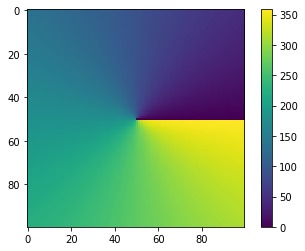

In [6]:
plt.imshow(phi)
plt.colorbar()
plt.show()

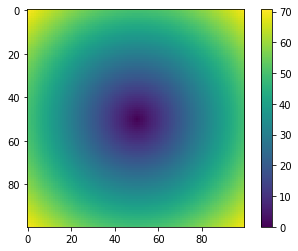

In [7]:
plt.imshow(R)
plt.colorbar()
plt.show()

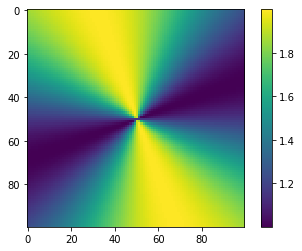

In [87]:
alpha = np.sqrt(np.cos((phi-phi_0)*np.pi/180)**2 + (np.sin((phi-phi_0)*np.pi/180)**2)/np.cos(incl*np.pi/180)**2)
plt.imshow(alpha)
plt.colorbar()
plt.show()

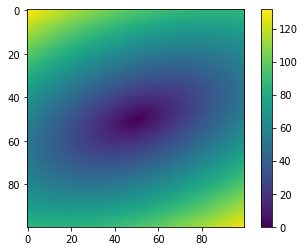

In [9]:
plt.imshow(R*alpha)
plt.colorbar()
plt.show()

In [5]:
def obs_vel_map(npix, r_max, r_t, v_t, incl, phi_0, v_sys):
    """
    Function to calculate the circular velocity in each radius of the galaxy according 
    to the simplest model of a galaxy's rotation curve (velocity grows linearly at the 
    beginning and then is constant).
    
    Parameters:
    -----------
    npix : Number of rows and columns of the square matrix
    r_max : Maximum radius of the galaxy (limits)
    r_t : Distance at which the galaxy reaches the maximum speed
    v_t : Maximum speed of the galaxy
    incl :  inclination angle
    phi_0 : position angle
    v_sys : systemic velocity
    
    Return:
    ----------
    v_los : Matrix of galaxy velocity along the line of sight
    """ 
    phi = np.zeros((npix, npix))
    R = np.zeros((npix, npix))

    for i in range(npix):
        for j in range(npix):
            #Distance between each pixel and the center (in pixels)
            y = -(i-round(npix/2))
            x = j-round(npix/2)
            pix = np.sqrt((i-round(npix/2))**2 + (j-round(npix/2))**2)
            R[i, j] = pix
        
            if x == 0 and y == 0:
                phi[i, j] = 0.0
            else:
                angle = np.arcsin(y/pix)
                if x < 0:                                     # 2nd and 3rd quadrants
                    phi[i, j] = 180.0 - angle*(180/np.pi)
                elif x >= 0 and y < 0:                        # 4th quadrant
                    phi[i, j] = angle*(180/np.pi) + 360
                else:                                         # 1st quadrant
                    phi[i, j] = angle*(180/np.pi)
                
    alpha = np.sqrt(np.cos((phi-phi_0)*np.pi/180)**2 + (np.sin((phi-phi_0)*np.pi/180)**2)/np.cos(incl*np.pi/180)**2)
    r_pix = R*alpha  # Real radius in galaxy in pixels calculated from the projection of them
    
    v_cir = np.zeros((npix, npix))
    #Edge 3% 
    edge = round(npix*0.03)

    #Conversion factor from pixels to radius
    pix2r = r_max/(npix/(2*np.cos(phi_0*np.pi/180)) - edge)
    r = r_pix*pix2r  #Distance in the units of the radius

    for i in range(npix):
        for j in range(npix):        
            if r[i,j] <= r_t:
                v_cir[i,j] = v_t*r[i,j]/r_t  #increasing velocity

            elif r_t < r[i,j] <= r_max:
                v_cir[i,j] = v_t            #constant velocity
                
    v_cir2 = np.zeros((npix, npix))
    for i in range(npix):
        for j in range(npix): 
            if r[i,j] <= r_max:            # exponential velocity
                v_cir2[i,j] = -v_t*np.e**(-r[i,j]/r_t)+v_t  
    v_cir2[v_cir2 == 0] = 'nan' 
    # If you want that outside the galaxy the matrix has nan values            
    v_cir[v_cir == 0] = 'nan' 
    v_los = v_sys + (v_cir2/alpha)*np.sin(incl*np.pi/180)*np.cos((phi-phi_0)*np.pi/180)
             
    return v_los

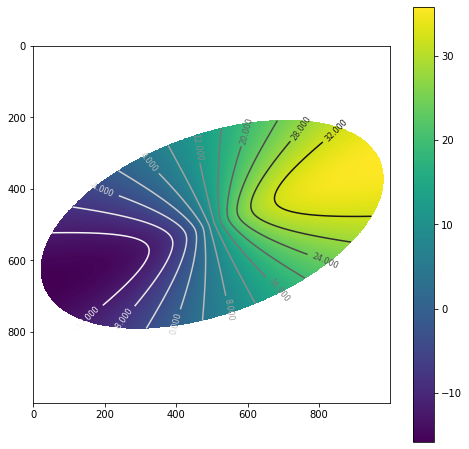

In [9]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(obs_vel_map(1000, 50, 10, 30, 60, 20, 10))
plt.colorbar()
cs = plt.contour(obs_vel_map(1000, 50, 10, 30, 60, 20, 10), 15, zorder = 10, cmap = 'Greys')
plt.clabel(cs, fontsize=8)
plt.show()

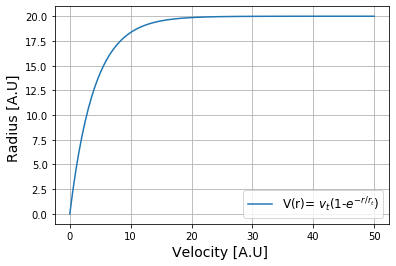

In [10]:
# New velocity profile used

r = np.linspace(0, 50, 100)
plt.plot(r, -20*np.e**(-r/4)+20, label = r'V(r)= $v_t$(1-$e^{-r/r_t}$)')
plt.xlabel(r'Velocity [A.U] ', fontsize = 14) 
plt.ylabel(r'Radius [A.U] ', fontsize = 14) 
plt.legend(fontsize = 12)
plt.grid()

In [11]:
def obs_vel_map(npix, r_max, r_t, v_t, incl, Psi_0, v_sys):
    """
    Function to calculate the circular velocity in each radius of the galaxy according 
    to the simplest model of a galaxy's rotation curve (velocity grows linearly at the 
    beginning and then is constant).
    
    Parameters:
    -----------
    npix : Number of rows and columns of the square matrix
    r_max : Maximum radius of the galaxy (limits)
    r_t : Distance at which the galaxy reaches the maximum speed
    v_t : Maximum speed of the galaxy
    incl :  inclination angle
    Psi_0 : position angle
    v_sys : systemic velocity
    
    Return:
    ----------
    v_los : Matrix of galaxy velocity along the line of sight
    """ 
    x = np.arange(npix)
    y = np.arange(npix)
    # Array of x,y coordinates, an element for each pixel in the image
    yy,xx = np.meshgrid(x,y)
    # central position of the array
    xc,yc = npix/2 -0.5, npix/2 -0.5
    # R and Psi matrix
    R = np.sqrt((xx-xc)**2 + (yy-yc)**2)
    Psi = np.arctan((yy-yc)/(xx-xc))
    Psi = np.rad2deg(Psi) + 90
    Psi[int(npix/2):,:] = Psi[int(npix/2):,:]+180
    # alpha and r matrix            
    alpha = np.sqrt(np.cos((Psi-Psi_0)*np.pi/180)**2 + (np.sin((Psi-Psi_0)*np.pi/180)**2)/np.cos(incl*np.pi/180)**2)
    r = R*alpha  # Real radius in galaxy in pixels calculated from the projection of them
                
    v_cir = -v_t*np.e**(-r/r_t)+v_t  
    v_cir[v_cir > -v_t*np.e**(-r_max/r_t)+v_t ] = 'nan'     # If you want that outside the galaxy the matrix has nan values  
          

    v_los = v_sys + (v_cir/alpha)*np.sin(incl*np.pi/180)*np.cos((Psi-Psi_0)*np.pi/180)
             
    return v_los

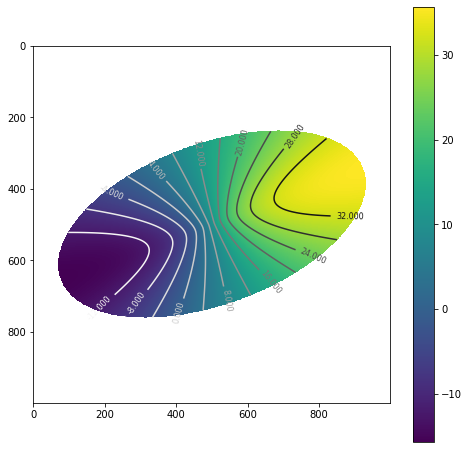

In [12]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(obs_vel_map(1000, 450, 100, 30, 60, 20, 10))
plt.colorbar()
cs = plt.contour(obs_vel_map(1000, 450, 100, 30, 60, 20, 10), 15, zorder = 10, cmap = 'Greys')
plt.clabel(cs, fontsize=8)
plt.show()